In [91]:
!git clone https://github.com/kumarvivek9088/aslsigndataset.git


fatal: destination path 'aslsigndataset' already exists and is not an empty directory.


In [ ]:
! pip install kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d muhammadalbrham/rgb-arabic-alphabets-sign-language-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip /content/rgb-arabic-alphabets-sign-language-dataset.zip



Streaming output truncated to the last 5000 lines.
  inflating: RGB ArSL dataset/Kaf/Kaf_140.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_141.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_142.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_143.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_144.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_145.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_146.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_147.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_148.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_149.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_15.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_150.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_151.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_152.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_153.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_154.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_155.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_156.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_157.jpg  
  inflating: RGB ArSL dataset/Kaf

In [ ]:
!pip install -q tensorflowjs


In [11]:
!pip install split-folders

In [14]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, numpy, pyyaml, scipy
Required-by: tensorflow


In [ ]:
!pip install tensorflow

In [2]:
!pip install TensorFlow==2.8
#!pip install keras==2.4.3


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.0 requires tensorflow~=2.16.1, but you have tensorflow 2.8.0 which is incompatible.
tensorflowjs 4.17.0 requires tensorflow<3,>=2.13.0, but you have tensorflow 2.8.0 which is incompatible.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.8.0 which is incompatible.


In [4]:
#!unzip /content/Hello.zip
dataset_path = "/content/RGB ArSL dataset"

In [3]:
import keras.preprocessing.image

if hasattr(keras.preprocessing.image, 'ImageDataGenerator'):
    print("ImageDataGenerator class is available.")
else:
    print("ImageDataGenerator class is not available.")

ImageDataGenerator class is available.


In [5]:
#from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

In [6]:
import splitfolders
dr = '/content/RGB ArSL dataset'
splitfolders.ratio(dr,"Datasplited" ,ratio=(0.8,0.2))

Copying files: 7856 files [00:51, 152.09 files/s]


In [8]:
import shutil
shutil.rmtree('/content/Datasplited/val/Yeh')

In [9]:
import shutil
#shutil.rmtree('/content/Datasplited/train/.ipynb_checkpoints')

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

train_generator = train_datagen.flow_from_directory(
    '/content/Datasplited/train',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/Datasplited/val',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 6055 images belonging to 30 classes.
Found 1529 images belonging to 30 classes.


In [10]:

class_names = list(train_generator.class_indices.keys())
#class_names.remove('.ipynb_checkpoints')
print(class_names)

['Ain', 'Al', 'Alef', 'Beh', 'Dad', 'Dal', 'Feh', 'Ghain', 'Hah', 'Heh', 'Jeem', 'Kaf', 'Khah', 'Laa', 'Lam', 'Meem', 'Noon', 'Qaf', 'Reh', 'Sad', 'Seen', 'Sheen', 'Tah', 'Teh', 'Teh_Marbuta', 'Thal', 'Theh', 'Waw', 'Zah', 'Zain']


In [11]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers


# output layer
model.add(Dense(30, activation='softmax'))


In [12]:


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )


In [13]:
!rm -rf Logs
logdir = os.path.join("Logs")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
import shutil
shutil.rmtree('/content/splitdataset48x48/val/Yeh')

In [14]:
model.fit(
    train_generator,

    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
47/47 [==============================] - 726s 15s/step - loss: 3.4052 - accuracy: 0.0385 - val_loss: 3.3995 - val_accuracy: 0.0419
Epoch 2/20
47/47 [==============================] - 661s 14s/step - loss: 3.3982 - accuracy: 0.0405 - val_loss: 3.3969 - val_accuracy: 0.0398
Epoch 3/20
47/47 [==============================] - 692s 15s/step - loss: 3.3985 - accuracy: 0.0395 - val_loss: 3.3963 - val_accuracy: 0.0412
Epoch 4/20
47/47 [==============================] - 713s 15s/step - loss: 3.3823 - accuracy: 0.0430 - val_loss: 3.3054 - val_accuracy: 0.0369
Epoch 5/20
47/47 [==============================] - 661s 14s/step - loss: 3.2269 - accuracy: 0.0850 - val_loss: 3.1323 - val_accuracy: 0.1030
Epoch 6/20
47/47 [==============================] - 693s 15s/step - loss: 2.9702 - accuracy: 0.1409 - val_loss: 2.8312 - val_accuracy: 0.1747
Epoch 7/20
47/47 [==============================] - 722s 15s/step - loss: 2.7117 - accuracy: 0.2126 - val_loss: 2.4362 - val_accuracy: 0.3033
Epoch 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir Logs

In [15]:
model_json = model.to_json()
with open("/content/signlanguagedetectionmodel48x48.json",'w') as json_file:
    json_file.write(model_json)

In [16]:
model.save("/content/drive/MyDrive/signlanguagedetectionmodel48x48.h5")

In [1]:
from google.colab import files
files.download("/content/drive/MyDrive/signlanguagedetectionmodel48x48.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


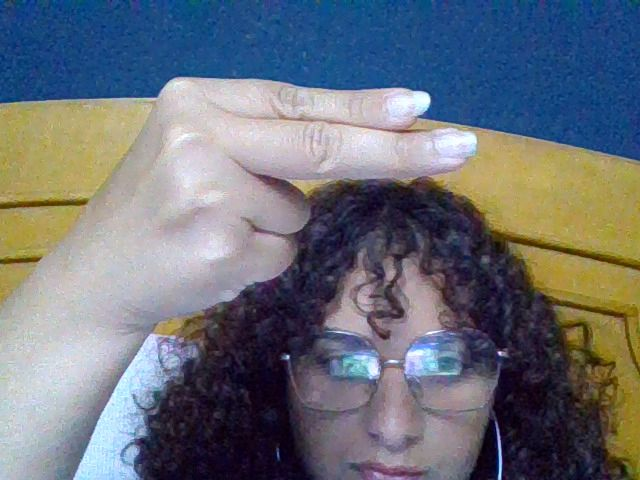

In [9]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 0s 95ms/step


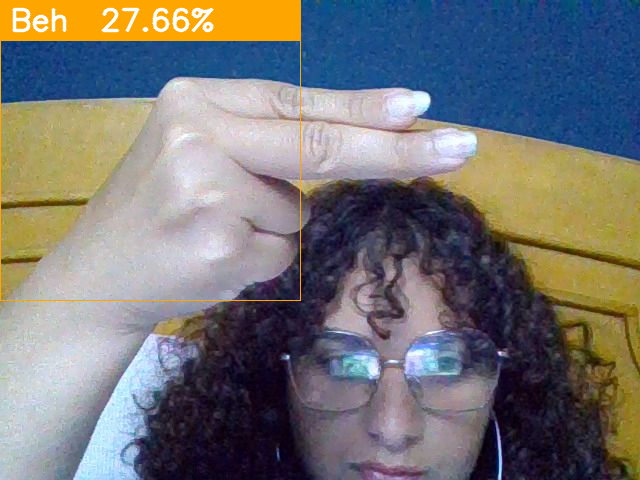

In [10]:
from keras.models import model_from_json
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def load_model(model_json_path, weights_path):
    json_file = open(model_json_path, "r")
    model_json = json_file.read()
    json_file.close()
    model = model_from_json(model_json)
    model.load_weights(weights_path)
    return model

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

def detect_gesture(image_path, model):
    label = ['Ain', 'Al', 'Alef', 'Beh', 'Dad', 'Dal', 'Feh', 'Ghain', 'Hah', 'Heh', 'Jeem', 'Kaf', 'Khah', 'Laa', 'Lam', 'Meem', 'Noon', 'Qaf', 'Reh', 'Sad', 'Seen', 'Sheen', 'Tah', 'Teh', 'Teh_Marbuta', 'Thal', 'Theh', 'Waw', 'Zah', 'Zain']
    frame = cv2.imread(image_path)
    cv2.rectangle(frame,(0,40),(300,300),(0, 165, 255),1)
    cropframe = frame[40:300,0:300]
    cropframe = cv2.cvtColor(cropframe, cv2.COLOR_BGR2GRAY)
    cropframe = cv2.resize(cropframe, (48,48))
    cropframe = extract_features(cropframe)
    pred = model.predict(cropframe)
    prediction_label = label[pred.argmax()]
    cv2.rectangle(frame, (0,0), (300, 40), (0, 165, 255), -1)
    if prediction_label == 'blank':
        cv2.putText(frame, "None", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        accu = "{:.2f}".format(np.max(pred)*100)
        cv2.putText(frame, f'{prediction_label}  {accu}%', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return frame

# Load the model
model = load_model("signlanguagedetectionmodel48x48.json", "signlanguagedetectionmodel48x48.h5")

# Path to the image you want to test
image_path = "/content/photo.jpg"

# Detect gesture and display the result
result_image = detect_gesture(image_path, model)
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
# Define a dictionary mapping labels to filenames in your dataset
label_to_filename = {
    'Hello': '/content/Data/Hello/WIN_20240404_22_50_39_Pro.jpg',
    'ILoveYou': '/content/Data/ILoveYou/WIN_20240405_22_37_18_Pro.jpg',
    "Let'sPlay": '/content/Data/LetsPlay/WIN_20240406_15_46_53_Pro.jpg',
    'No': '/content/Data/No/WIN_20240406_01_22_54_Pro.jpg',
    'Yes': '/content/Data/Yes/WIN_20240406_01_37_20_Pro.jpg',
    'You': '/content/Data/You/WIN_20240406_15_35_07_Pro.jpg',
    'bathroom': '/content/Data/bathroom/IMG20240405221328_BURST000_COVER.jpg',
    'drink': '/content/Data/drink/IMG20240406170403_BURST000_COVER.jpg',
    'eat': '/content/Data/eat/IMG20240406173527_BURST000_COVER.jpg',
    'water': '/content/Data/water/IMG20240405190804_BURST000_COVER.jpg'
}

# Function to display the image corresponding to the predicted label
def display_matching_image(prediction_label):
    if prediction_label in label_to_filename:
        image_filename = label_to_filename[prediction_label]
        matching_image = cv2.imread(image_filename)
        cv2_imshow(matching_image)
    else:
        print("No matching image found for the predicted label.")

# Load the model
model = load_model("signlanguagedetectionmodel48x48.json", "signlanguagedetectionmodel48x48.h5")

# Path to the image you want to test
image_path = "/content/photo.jpg"

# Detect gesture and display the result
result_image = detect_gesture(image_path, model)
cv2_imshow(result_image)

# Display the image from the dataset with the same sign
display_matching_image(prediction_label)
